In [25]:
import torch
import torch.nn as nn
from analyze_features import *
import os
import json
import glob
from torch_geometric.data import HeteroData


# Feature importance (saliency maps) for cell line features

In [26]:
data_path = 'Data/multigraphs/heteroData_gene_cell_Neuroblastoma_cgp_expression_marker_genes_META2.pt'


## Model gnn

In [38]:

model_path = glob.glob('./Results/Neuroblastoma_cgp_expression_marker_genes_gnn/models/Neuroblastoma_cgp_expression_marker_genes_gnn_seed37*.pt')
print(model_path)

config_path = 'Results/Neuroblastoma_cgp_expression_marker_genes_gnn/grid_search/best_hyperparams.json'
with open(config_path, 'r') as f:
    results = json.load(f)

hidden_features = results['hyperparams']['hidden_features']
if isinstance(hidden_features, str):
    hidden_features = [int(x.strip()) for x in hidden_features.split(',')]
print(hidden_features)

# Configuration parameters
MODEL_CONFIG = {
    'model_type': 'gnn',  # Options: 'gnn-gnn', 'gnn-mlp', 'mlp', 'gnn'
    'embedding_dim': 512,
    'hidden_features': hidden_features,  # opzoeken in grid_results
    'dropout': 0.2,
    'act_fn': nn.Sigmoid,  
    'lp_model': 'deep',  # Options: 'simple', 'deep'
    'aggregate': 'mean'
}


['./Results/Neuroblastoma_cgp_expression_marker_genes_gnn/models/Neuroblastoma_cgp_expression_marker_genes_gnn_seed37_epoch14.pt']
[-1, 512, 256]


In [39]:
# Create results directory
results_dir = create_results_directory(model_type=MODEL_CONFIG['model_type'])


device = 'cuda' if torch.cuda.is_available() else 'cpu'
model, data = load_model_and_data(model_path[0], data_path, device, MODEL_CONFIG)

# Load gene names
gene_names = load_gene_names()

# Compute feature importance
importance_scores = compute_feature_importance(model, data, device)

# Analyze and visualize results
analyze_feature_importance(importance_scores, gene_names)

# Save results
save_importance_scores(importance_scores, gene_names, results_dir)

print(f"\nAnalysis complete! Results have been saved in: {results_dir}")
print("The following files have been created:")
print("1. cell_features_importance.csv - Complete cell feature importance scores")
print("2. top_cell_features.png - Visualization of top 20 cell features")
print("3. analysis_summary.txt - Summary statistics and top features")

Results will be saved in: Results/feature_analysis/gnn_20250527_174102
Loading data from: Data/multigraphs/heteroData_gene_cell_Neuroblastoma_cgp_expression_marker_genes_META2.pt
Data loaded successfully
Data structure: HeteroData(
  metapath_dict={ (cell, metapath_0, cell)=[2] },
  gene={
    node_id=[13398],
    names=[13398],
    x=[13398, 3438],
  },
  cell={
    node_id=[32],
    names=[32],
    x=[32, 3000],
  },
  (gene, interacts_with, gene)={ edge_index=[2, 263122] },
  (gene, dependency_of, cell)={
    edge_index=[2, 29438],
    edge_label=[29438],
  },
  (cell, has_mutation_in, gene)={
    edge_index=[2, 588],
    edge_attr=[588],
  },
  (gene, rev_interacts_with, gene)={ edge_index=[2, 263122] },
  (cell, rev_dependency_of, gene)={
    edge_index=[2, 29438],
    edge_label=[29438],
  },
  (gene, rev_has_mutation_in, cell)={
    edge_index=[2, 588],
    edge_attr=[588],
  },
  (cell, metapath_0, cell)={
    edge_index=[2, 238],
    edge_weight=[238],
  }
)
Available edge typ

KeyboardInterrupt: 

## Model: gnn-gnn

In [45]:
 # Load model and data
model_path = glob.glob('./Results/Neuroblastoma_cgp_expression_marker_genes_gnn-gnn/models/Neuroblastoma_cgp_expression_marker_genes_gnn-gnn_seed37*.pt')
print(model_path)

config_path = 'Results/Neuroblastoma_cgp_expression_marker_genes_gnn-gnn/grid_search/best_hyperparams.json'
with open(config_path, 'r') as f:
    results = json.load(f)

hidden_features = results['hyperparams']['hidden_features']
if isinstance(hidden_features, str):
    hidden_features = [int(x.strip()) for x in hidden_features.split(',')]
print(hidden_features)

# Configuration parameters
MODEL_CONFIG = {
    'model_type': 'gnn-gnn',  # Options: 'gnn-gnn', 'gnn-mlp', 'mlp', 'gnn'
    'embedding_dim': 512,
    'hidden_features': hidden_features,  # opzoeken in grid_results
    'dropout': 0.2,
    'act_fn': nn.Sigmoid,  
    'lp_model': 'deep',  # Options: 'simple', 'deep'
    'aggregate': 'mean'
}


# Create results directory
results_dir = create_results_directory(model_type=MODEL_CONFIG['model_type'])


device = 'cuda' if torch.cuda.is_available() else 'cpu'
model, data = load_model_and_data(model_path[0], data_path, device, MODEL_CONFIG)

# Load gene names
gene_names = load_gene_names()

# Compute feature importance
importance_scores = compute_feature_importance(model, data, device)

# Analyze and visualize results
analyze_feature_importance(importance_scores, gene_names)

# Save results
save_importance_scores(importance_scores, gene_names, results_dir)

print(f"\nAnalysis complete! Results have been saved in: {results_dir}")
print("The following files have been created:")
print("1. cell_features_importance.csv - Complete cell feature importance scores")
print("2. top_cell_features.png - Visualization of top 20 cell features")
print("3. analysis_summary.txt - Summary statistics and top features")


['./Results/Neuroblastoma_cgp_expression_marker_genes_gnn-gnn/models/Neuroblastoma_cgp_expression_marker_genes_gnn-gnn_seed37_epoch20.pt']
[-1, 128, 64]
Results will be saved in: Results/feature_analysis/gnn-gnn_20250527_174608
Loading data from: Data/multigraphs/heteroData_gene_cell_Neuroblastoma_cgp_expression_marker_genes_META2.pt
Data loaded successfully
Data structure: HeteroData(
  metapath_dict={ (cell, metapath_0, cell)=[2] },
  gene={
    node_id=[13398],
    names=[13398],
    x=[13398, 3438],
  },
  cell={
    node_id=[32],
    names=[32],
    x=[32, 3000],
  },
  (gene, interacts_with, gene)={ edge_index=[2, 263122] },
  (gene, dependency_of, cell)={
    edge_index=[2, 29438],
    edge_label=[29438],
  },
  (cell, has_mutation_in, gene)={
    edge_index=[2, 588],
    edge_attr=[588],
  },
  (gene, rev_interacts_with, gene)={ edge_index=[2, 263122] },
  (cell, rev_dependency_of, gene)={
    edge_index=[2, 29438],
    edge_label=[29438],
  },
  (gene, rev_has_mutation_in, cel

KeyboardInterrupt: 

## Model: mlp-gnnn

In [47]:
 # Load model and data
model_path = glob.glob('./Results/Neuroblastoma_cgp_expression_marker_genes_gnn-mlp/models/Neuroblastoma_cgp_expression_marker_genes_gnn-mlp_seed37*.pt')
print(model_path)

config_path = 'Results/Neuroblastoma_cgp_expression_marker_genes_gnn-mlp/grid_search/best_hyperparams.json'
with open(config_path, 'r') as f:
    results = json.load(f)

hidden_features = results['hyperparams']['hidden_features']
if isinstance(hidden_features, str):
    hidden_features = [int(x.strip()) for x in hidden_features.split(',')]
print(hidden_features)

# Configuration parameters
MODEL_CONFIG = {
    'model_type': 'gnn-mlp',  # Options: 'gnn-gnn', 'gnn-mlp', 'mlp', 'gnn'
    'embedding_dim': 512,
    'hidden_features': hidden_features,  # opzoeken in grid_results
    'dropout': 0.2,
    'act_fn': nn.Sigmoid,  
    'lp_model': 'deep',  # Options: 'simple', 'deep'
    'aggregate': 'mean'
}


# Create results directory
results_dir = create_results_directory(model_type=MODEL_CONFIG['model_type'])


device = 'cuda' if torch.cuda.is_available() else 'cpu'
model, data = load_model_and_data(model_path[0], data_path, device, MODEL_CONFIG)

# Load gene names
gene_names = load_gene_names()

# Compute feature importance
importance_scores = compute_feature_importance(model, data, device)

# Analyze and visualize results
analyze_feature_importance(importance_scores, gene_names)

# Save results
save_importance_scores(importance_scores, gene_names, results_dir)

print(f"\nAnalysis complete! Results have been saved in: {results_dir}")
print("The following files have been created:")
print("1. cell_features_importance.csv - Complete cell feature importance scores")
print("2. top_cell_features.png - Visualization of top 20 cell features")
print("3. analysis_summary.txt - Summary statistics and top features")

['./Results/Neuroblastoma_cgp_expression_marker_genes_gnn-mlp/models/Neuroblastoma_cgp_expression_marker_genes_gnn-mlp_seed37_epoch9.pt']
[-1, 256, 128]
Results will be saved in: Results/feature_analysis/gnn-mlp_20250527_174742
Loading data from: Data/multigraphs/heteroData_gene_cell_Neuroblastoma_cgp_expression_marker_genes_META2.pt
Data loaded successfully
Data structure: HeteroData(
  metapath_dict={ (cell, metapath_0, cell)=[2] },
  gene={
    node_id=[13398],
    names=[13398],
    x=[13398, 3438],
  },
  cell={
    node_id=[32],
    names=[32],
    x=[32, 3000],
  },
  (gene, interacts_with, gene)={ edge_index=[2, 263122] },
  (gene, dependency_of, cell)={
    edge_index=[2, 29438],
    edge_label=[29438],
  },
  (cell, has_mutation_in, gene)={
    edge_index=[2, 588],
    edge_attr=[588],
  },
  (gene, rev_interacts_with, gene)={ edge_index=[2, 263122] },
  (cell, rev_dependency_of, gene)={
    edge_index=[2, 29438],
    edge_label=[29438],
  },
  (gene, rev_has_mutation_in, cel

KeyboardInterrupt: 

## Model: mlp

['./Results/Neuroblastoma_cgp_expression_marker_genes_mlp/models/Neuroblastoma_cgp_expression_marker_genes_mlp_seed37_epoch26.pt']
[-1, 128, 64]
Results will be saved in: Results/feature_analysis/mlp_20250527_174907
Loading data from: Data/multigraphs/heteroData_gene_cell_Neuroblastoma_cgp_expression_marker_genes_META2.pt
Data loaded successfully
Data structure: HeteroData(
  metapath_dict={ (cell, metapath_0, cell)=[2] },
  gene={
    node_id=[13398],
    names=[13398],
    x=[13398, 3438],
  },
  cell={
    node_id=[32],
    names=[32],
    x=[32, 3000],
  },
  (gene, interacts_with, gene)={ edge_index=[2, 263122] },
  (gene, dependency_of, cell)={
    edge_index=[2, 29438],
    edge_label=[29438],
  },
  (cell, has_mutation_in, gene)={
    edge_index=[2, 588],
    edge_attr=[588],
  },
  (gene, rev_interacts_with, gene)={ edge_index=[2, 263122] },
  (cell, rev_dependency_of, gene)={
    edge_index=[2, 29438],
    edge_label=[29438],
  },
  (gene, rev_has_mutation_in, cell)={
    edg

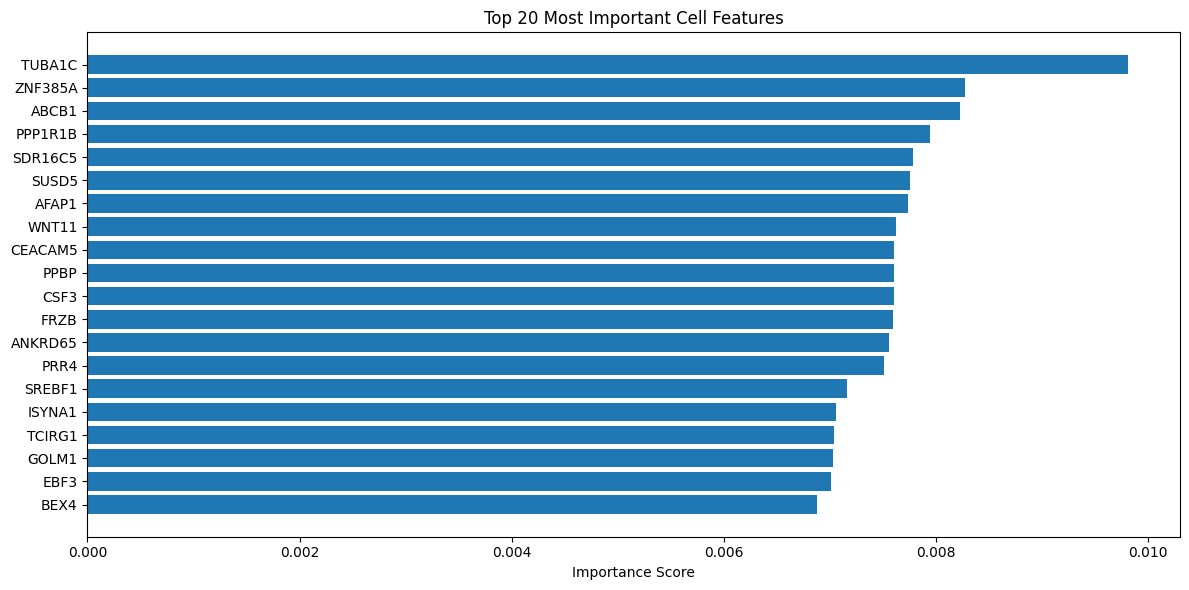


Top 20 Most Important Cell Features:
BEX4: 0.0069
EBF3: 0.0070
GOLM1: 0.0070
TCIRG1: 0.0070
ISYNA1: 0.0071
SREBF1: 0.0072
PRR4: 0.0075
ANKRD65: 0.0076
FRZB: 0.0076
CSF3: 0.0076
PPBP: 0.0076
CEACAM5: 0.0076
WNT11: 0.0076
AFAP1: 0.0077
SUSD5: 0.0078
SDR16C5: 0.0078
PPP1R1B: 0.0079
ABCB1: 0.0082
ZNF385A: 0.0083
TUBA1C: 0.0098

Analysis complete! Results have been saved in: Results/feature_analysis/mlp_20250527_174907
The following files have been created:
1. cell_features_importance.csv - Complete cell feature importance scores
2. top_cell_features.png - Visualization of top 20 cell features
3. analysis_summary.txt - Summary statistics and top features


In [49]:
 # Load model and data
model_path = glob.glob('./Results/Neuroblastoma_cgp_expression_marker_genes_mlp/models/Neuroblastoma_cgp_expression_marker_genes_mlp_seed37*.pt')
print(model_path)

config_path = 'Results/Neuroblastoma_cgp_expression_marker_genes_mlp/grid_search/best_hyperparams.json'
with open(config_path, 'r') as f:
    results = json.load(f)

hidden_features = results['hyperparams']['hidden_features']
if isinstance(hidden_features, str):
    hidden_features = [int(x.strip()) for x in hidden_features.split(',')]
print(hidden_features)

# Configuration parameters
MODEL_CONFIG = {
    'model_type': 'mlp',  # Options: 'gnn-gnn', 'gnn-mlp', 'mlp', 'gnn'
    'embedding_dim': 512,
    'hidden_features': hidden_features,  # opzoeken in grid_results
    'dropout': 0.2,
    'act_fn': nn.Sigmoid,  
    'lp_model': 'deep',  # Options: 'simple', 'deep'
    'aggregate': 'mean'
}


# Create results directory
results_dir = create_results_directory(model_type=MODEL_CONFIG['model_type'])


device = 'cuda' if torch.cuda.is_available() else 'cpu'
model, data = load_model_and_data(model_path[0], data_path, device, MODEL_CONFIG)

# Load gene names
gene_names = load_gene_names()

# Compute feature importance
importance_scores = compute_feature_importance(model, data, device)

# Analyze and visualize results
analyze_feature_importance(importance_scores, gene_names)

# Save results
save_importance_scores(importance_scores, gene_names, results_dir)

print(f"\nAnalysis complete! Results have been saved in: {results_dir}")
print("The following files have been created:")
print("1. cell_features_importance.csv - Complete cell feature importance scores")
print("2. top_cell_features.png - Visualization of top 20 cell features")
print("3. analysis_summary.txt - Summary statistics and top features")